In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Utilizando MLP

In [3]:
X = iris.iloc[:,:4]
y = iris.iloc[:, 4]
# Vamos remover 20% do nosso conjunto de treinamento
# E usar como teste do nosso modelo k-NN
list_ids = list(range(len(y)))
ids_test = list(np.random.choice(list_ids, int(len(list_ids)*0.20), replace=False))

print(len(y), len(ids_test))
X_teste = X.iloc[ids_test]
X = X.drop(index=ids_test)
y_teste = y.iloc[ids_test]
y = y.drop(index=ids_test)
print(len(y), len(y_teste))

150 30
120 30


In [4]:
from sklearn.neural_network import MLPClassifier

batch_size = len(X)
mlp1 = MLPClassifier(
    activation="identity", 
    hidden_layer_sizes=(4,), # tupla(x,)
    max_iter=100, 
    batch_size=batch_size, 
    learning_rate_init=0.001
)

mlp1.fit(X, y)
print('identity: ', mlp1.score(X_teste, y_teste))

mlp2 = MLPClassifier(
    activation="logistic", 
    hidden_layer_sizes=(4,), 
    max_iter=100, 
    batch_size=batch_size, 
    learning_rate_init=0.001
)

mlp2.fit(X, y)
print('logistic: ', mlp2.score(X_teste, y_teste))

mlp3 = MLPClassifier(
    activation="tanh", 
    hidden_layer_sizes=(4,), 
    max_iter=100, 
    batch_size=batch_size, 
    learning_rate_init=0.001
)

mlp3.fit(X, y)
print('tanh: ', mlp3.score(X_teste, y_teste))

mlp4 = MLPClassifier(
    activation="relu", 
    hidden_layer_sizes=(4,), 
    max_iter=100, 
    batch_size=batch_size, 
    learning_rate_init=0.001
)

mlp4.fit(X, y)
print('relu: ', mlp4.score(X_teste, y_teste))

C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


identity:  0.8333333333333334
logistic:  0.16666666666666666
tanh:  0.3333333333333333
relu:  0.16666666666666666


C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


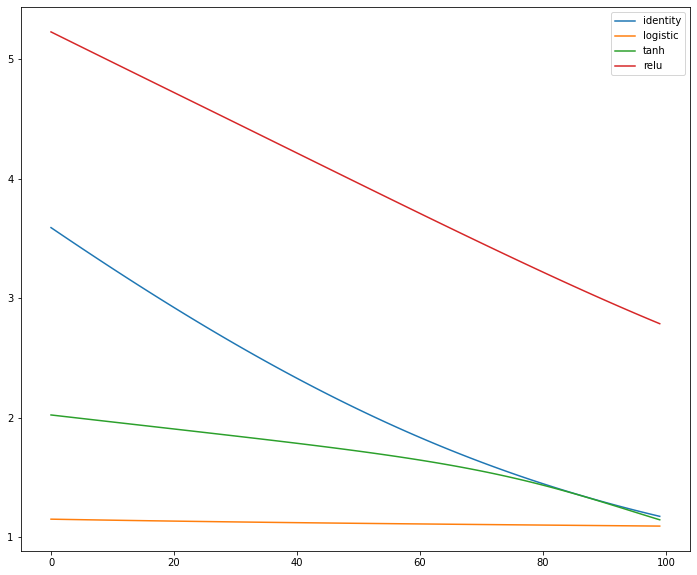

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(mlp1.loss_curve_, label='identity')
plt.plot(mlp2.loss_curve_, label='logistic')
plt.plot(mlp3.loss_curve_, label='tanh')
plt.plot(mlp4.loss_curve_, label='relu')
plt.legend()
plt.show()

In [6]:
from sklearn.neural_network import MLPClassifier

# Hiper-parâmetros
layers=(8, 16, 32)
iters=500
batch_size=26
learning_rate_init=0.01

mlp1 = MLPClassifier(
    activation="identity", 
    hidden_layer_sizes=layers, 
    max_iter=iters, 
    batch_size=batch_size, 
    learning_rate_init=learning_rate_init
)

mlp1.fit(X, y)
print('identity: ', mlp1.score(X_teste, y_teste))

mlp2 = MLPClassifier(
    activation="logistic", 
    hidden_layer_sizes=layers, 
    max_iter=iters, 
    batch_size=batch_size, 
    learning_rate_init=learning_rate_init
)

mlp2.fit(X, y)
print('logistic: ', mlp2.score(X_teste, y_teste))

mlp3 = MLPClassifier(
    activation="tanh", 
    hidden_layer_sizes=layers, 
    max_iter=iters, 
    batch_size=batch_size, 
    learning_rate_init=learning_rate_init
)

mlp3.fit(X, y)
print('tanh: ', mlp3.score(X_teste, y_teste))

mlp4 = MLPClassifier(
    activation="relu", 
    hidden_layer_sizes=layers, 
    max_iter=iters, 
    batch_size=batch_size, 
    learning_rate_init=learning_rate_init
)

mlp4.fit(X, y)
print('relu: ', mlp4.score(X_teste, y_teste))

identity:  0.9666666666666667
logistic:  0.9666666666666667
tanh:  0.9666666666666667
relu:  0.9666666666666667


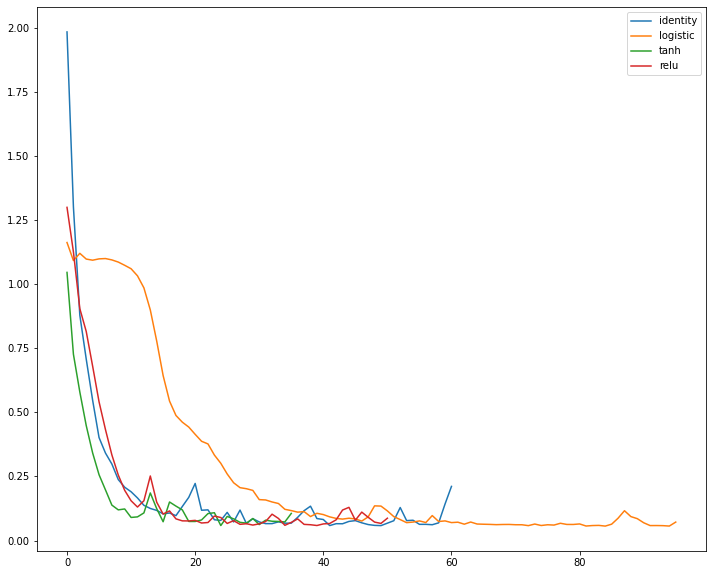

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(mlp1.loss_curve_, label='identity')
plt.plot(mlp2.loss_curve_, label='logistic')
plt.plot(mlp3.loss_curve_, label='tanh')
plt.plot(mlp4.loss_curve_, label='relu')
plt.legend()
plt.show()